### 1. Docker的安装

Tutorial: https://docs.docker.com/engine/install/ubuntu/

跟着教程一路复制粘贴回车即可。 唯一的难点就是看懂英文的安装教程，看清楚段落层次结构。

反正，最后如果你运行sudo docker run hello-world，可以跑通，看到：
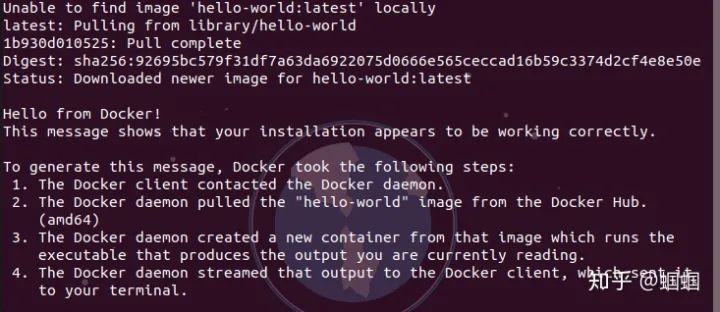
就说明Docker已经被你成功安装了！

### 2. Nvidia-docker的安装
为何又蹦出来一个nvidia-docker？因为原本的docker不支持GPU加速，所以NVIDIA单独做了一个docker，来让docker镜像可以使用NVIDIA的gpu。 
(链接： https://github.com/NVIDIA/nvidia-docker) 也是直接找对应的操作系统的命令，一行行复制粘贴回车就搞定了。

反正，最后当你运行docker run --runtime=nvidia --rm nvidia/cuda:9.0-base nvidia-smi时，如果看到：
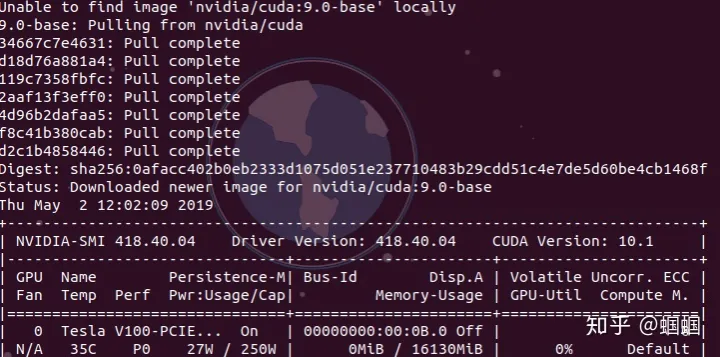
恭喜，安装成功了！

### 3. 深度学习镜像的安装
我这里使用镜像是deepo一款咱们中国人做出来的深度学习镜像，包含了现在多数流行的深度学习框架，而且版本也很新，所以我这个小白第一次就选择了这个。 链接：https://hub.docker.com/r/ufoym/deepo 只有安装好了前面的docker和nvidia-docker，这里就很方便了。 直接通过命令docker pull ufoym/deepo就可以把各种框架都下载下来。但是这样比较大，费时较长，所以教程里面也提供了只安装某一种框架的方式：
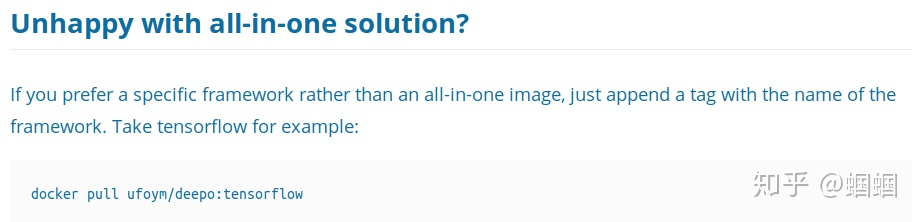

另外，还提供了jupyter notebook版的镜像，我这里就是安装的这个，因为我日常基本都是使用jupyter notebook，这里贴一下我的命令：

`sudo docker pull ufoym/deepo:all-jupyter-py36-cu100`

这里的all-jupyter-py36-cu100也是deepo提供的jupyter notebook镜像的tag。 安装好之后，通过docker images命令，可以查看已经下载好的镜像：

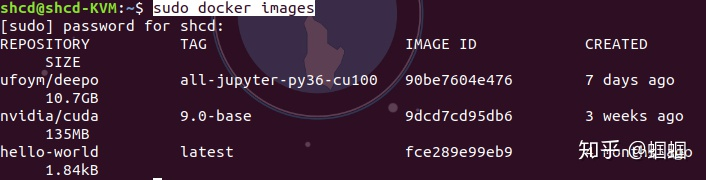
好了，该装的东西都装好了，下面进入操作部分了！

## 二、Docker最常用操作

### （一）基本概念
image，镜像，是一个个配置好的环境。 container，容器，是image的具体实例。 image和container的关系，相当于面向对象中类与对象的关系。

如何查询命令参数： docker可以看docker客户端有那些基本命令； 对应每一条命令，想看看具体是做什么的，可以在后面加一个--help查看具体用法，例如对于run命令： docker run --help

### （二）容器的相关操作
### 1.容器的创建、查看、删除

`docker run [-it] some-image` 创建某个镜像的容器。注意，同一个镜像可以通过这种方式创建任意多个container. 加上-it之后，可以创建之后，马上进入交互模式。

`docker ps` 列出当前运行的容器
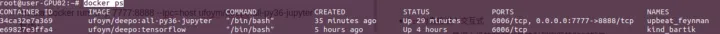

`docker ps -a`  列出所有的容器，包括运行的和不运行的
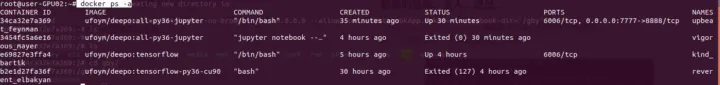

`docker rm container-id`  删除某个容器

### 2.容器的启动、进入、退出：
`docker start [-i] container-id`    启动某个容器，必须是已经创建的。 加上-i 参数之后，可以直接进入交互模式：
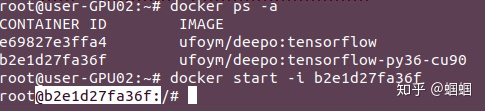

除了通过-i进入交互模式，还有一种方法，那就是通过attach: docker attach container-id
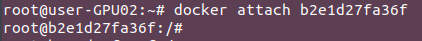

进入交互模式之后，怎么退出呢： - 想退出但是保持容器运行，按CTRL+Q+P三个键 - 退出，并关闭停止容器，按CTRL+D或者输入exit再回车

注：Ctrl+P+Q按的时候有时候会不灵，多按几次！

容器的停止、重启： `docker stop container-id docker restart container-id`

### （三）Docker jupyter notebook 服务 [力荐!]
深度学习jupyter notebook镜像已经创建：
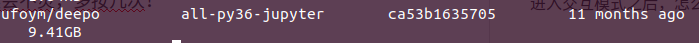

### 1.如何创建自己的可以远程访问的容器：
`sudo nvidia-docker run -it -p 7777:8888 --ipc=host -v /home/shcd/Documents/gby:/gby --name gby-notebook  90be7604e476`

其中： - -it为直接进入交互式 - -p 7777:8888是把主机的7777端口映射到容器的8888端口 - -ipc=host可以让容器与主机共享内存 - 还可以加一个--name xxxxx给容器定义一个个性化名字 - -v /home/shcd/Documents/gby:/gby可以讲主机上的/home/shcd/Documents/gby地址挂载到容器里，并命名为/data文件夹，这样这个文件夹的内容可以在容器和主机之间共享了。因为容器一旦关闭，容器中的所有改动都会清除，所以这样挂载一个地址可以吧容器内的数据保存到本地。 - 90be7604e476则是你安装的jupyter镜像的id，可以在刚刚docker images命令后面查看，当然你也可以直接写全名ufoym/deepo:all-py36-jupyter

经过上面的操作，你应该可以直接进入容器了，这时你用ls命令，应该可以看到一个新的文件夹gby产生了！
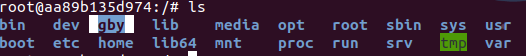

### 2.创建了容器之后，我们可以进而启动jupyter notebook：
`jupyter notebook --no-browser --ip=0.0.0.0 --allow-root --NotebookApp.token= --notebook-dir='/gby'`

其中： - --no-browser即不通过浏览器启动，--ip指定容器的ip，--allow-root允许root模型运行 - --NotebookApp.token可以指定jupyter 登录密码，可以为空 - --notebook-dir='/gby'指定jupyter的根目录



### 3.开启本地与服务器的端口映射，从而远程登录jupyter：
在本地机器上，执行如下命令：

`ssh username@host-ip -L 1234:127.0.0.1:7777`

这样，可以将本地的1234端口，映射到服务器的localhost的7777端口（即你前面创建jupyter容器时候的指定的服务器端口） 这样，你在本地电脑的浏览器里输入'localhost:1234'，即可登录到服务器上的jupyter notebook了！
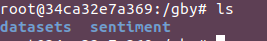

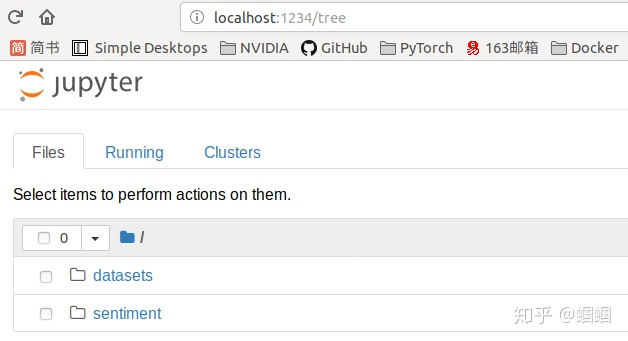

### （四）容器的备份

之前好不容易配置好的环境，突然被学校服务器要重装！？怎么办？ 你想到的一定是：能不能把配置好的环境备份一份，后面直接重新加载进来？

方法也很简单： 一般情况下，我们想备份的是容器，因为我们具体的配置都是在容器中进行的，而镜像一般都是直接在网上下载的，我们不做什么改动。

### 1. 先通过docker ps或者docker ps -a来查看你想备份的容器的id， 然后通过：

`docker commit -p [your-container-id] [your-backup-name]`

来将id为your-container-id的容器创建成一个镜像快照。

### 2.接着，你通过docker images就可以查看到刚刚创建好的镜像快照了。 然后，通过：

`docker save -o [path-you-want-to-save/your-backup-name.tar]] [your-backup-name]`

把那个镜像打包成tar文件，保存到服务器上。 后面就可以把服务器上打包好的tar文件，下载到本地了。

### 3.恢复：
`docker load -i your-backup-name.tar docker run -d -p 80:80 your-backup-name`

以上就是我目前使用到的最常用的用法了，至少对我目前的需求来说是够用了，随着我使用次数的变多，我也会不断更新。希望能够减少大家在环境搭建之路上的折磨吧！